In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import numpy as np

In [6]:
car_dataset = pd.read_csv('D:\MLproject1\CSV Files\car data.csv')

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Sunny\AppData\Local\Temp\ipykernel_23972\2057966541.py:1: SyntaxWarning: invalid escape sequence '\M'
  car_dataset = pd.read_csv('D:\MLproject1\CSV Files\car data.csv')


In [7]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
car_dataset.shape

(301, 9)

In [9]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
car_dataset.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [14]:
car_dataset.Seller_Type.value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [15]:
car_dataset.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [46]:
car_dataset.replace({'Fuel_Type':{'Petrol':0 ,'Diesel':1,'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0 ,'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0 ,'Automatic':1}},inplace=True)

In [47]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,1,0,0
1,sx4,2013,4.75,9.54,43000,1,1,0,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,0
3,wagon r,2011,2.85,4.15,5200,0,1,0,0
4,swift,2014,4.60,6.87,42450,1,1,0,0


In [49]:
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']

In [50]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            1             0   
1    2013           9.54       43000          1            1             0   
2    2017           9.85        6900          0            1             0   
3    2011           4.15        5200          0            1             0   
4    2014           6.87       42450          1            1             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            1             0   
297  2015           5.90       60000          0            1             0   
298  2009          11.00       87934          0            1             0   
299  2017          12.50        9000          1            1             0   
300  2016           5.90        5464          0            1             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [52]:
lin_reg_model= LinearRegression()

In [53]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [54]:
y_pred=lin_reg_model.predict(X_train)

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [56]:
MAE=mean_absolute_error(y_pred,Y_train)

In [57]:
MAE

1.2166174093917956

In [58]:
MSE= mean_squared_error(y_pred,Y_train)

In [59]:
MSE

3.259030823309101

In [60]:
RMSE=np.sqrt(MSE)

In [61]:
RMSE

1.8052785999144567

In [62]:
error_score = metrics.r2_score(Y_train, y_pred)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493706


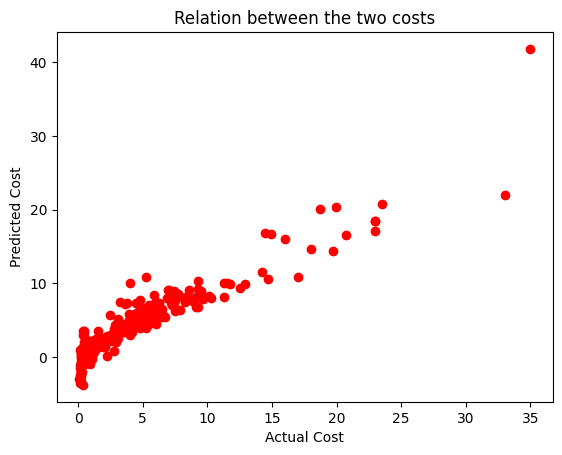

In [71]:

plt.scatter(Y_train,y_pred,c='red')
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Relation between the two costs")
plt.show()

In [73]:
y_testpred = lin_reg_model.predict(X_test)

In [74]:
MAE=mean_absolute_error(y_testpred,Y_test)

In [75]:
MAE

1.1516382156622877

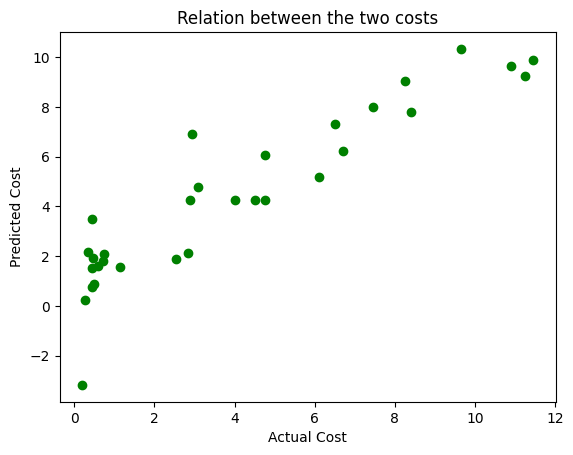

In [77]:
plt.scatter(Y_test,y_testpred,c='green')
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Relation between the two costs")
plt.show()